# Digit recognizer. Part 1. SVM, Logistic regression & SGDC.

## Loading packages and data.

In [1]:
import pandas as pd
import numpy  as np
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
GridSearchCV
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.linear_model import SGDClassifier
%matplotlib inline

In [2]:
df_train = pd.read_csv("C:/Users/pozir/OneDrive/Documentos/XDigit_Recognizer/train.csv")
df_test = pd.read_csv("C:/Users/pozir/OneDrive/Documentos/XDigit_Recognizer/test.csv")

## Creating arrays for the features and the response variable and dividing them into train and hold out sets.


In [3]:
X=df_train.iloc[5000:15000,1:]
y=df_train.iloc[5000:15000,:1]

 Split df_train into training and test(hold out) set 
Even though we are going to use  cross-validation that splits the training set into parts, it's often a good idea to hold out 
a separate test set to make sure the cross-validation results are sensible.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 784)
(8000, 1)
(2000, 784)
(2000, 1)


## 1. SVM model.

Fitting a base model and checking the test score.

In [6]:
svm = SVC()
svm.fit(X_train, y_train.values.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
print(svm.score(X_train, y_train.values.ravel()))
print(svm.score(X_test, y_test.values.ravel()))

1.0
0.1145


Only 0.1 on the hold out set - not very promissing! Let´s see what we can do about it.

### 2.1 Viewing the data

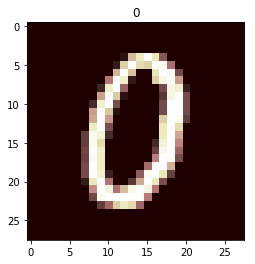

In [8]:
i=5
img=df_train.drop('label', axis=1).iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='pink')
plt.title(df_train.drop('label', axis=1).iloc[i,0])

(array([654.,  18.,   7.,   6.,   7.,   6.,  10.,  11.,  12.,  53.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

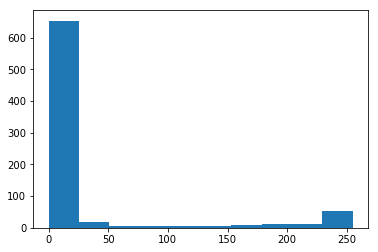

In [9]:
plt.hist(df_train.drop('label', axis=1).iloc[i])

As we can see the image is blurry which means there are many shades and just two colors. Let's make them true black and white to simplify the task.

In [10]:
X_train[X_train>0]=1
X_test[X_test>0]=1


C:\Users\pozir\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pozir\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\pozir\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

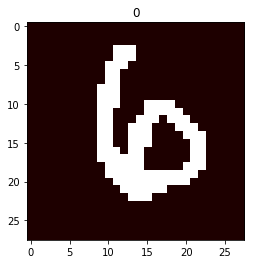

In [11]:
i=9
img=X_train.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='pink')
plt.title(X_train.iloc[i,0])


(array([666.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

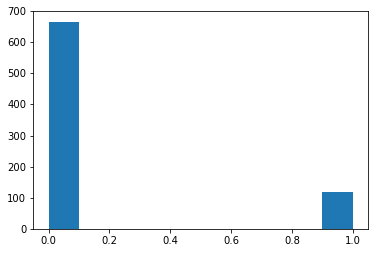

In [12]:

plt.hist(X_train.iloc[i])

Let´s try fitting the base model now.

In [13]:
svm.fit(X_train, y_train.values.ravel())
print("The train score is", svm.score(X_train, y_train.values.ravel()))
print("The test score is", svm.score(X_test, y_test.values.ravel()))

The train score is 0.929125
The test score is 0.9155


Looks much better, ahh?

### 2.2 Tuning Grid Search (gamma only).

 Now we can further improve the accuracy and be more certain of how well our model performs by searching for the gamma that 
 maximizes cross-validation accuracy using scikit-learn's GridSearchCV

In [14]:
# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher_svm = GridSearchCV(svm, parameters, cv=5)
searcher_svm.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
print("Best CV params", searcher_svm.best_params_)
print("Best CV accuracy", searcher_svm.best_score_)
# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher_svm.score(X_test, y_test.values.ravel()))

Best CV params {'gamma': 0.01}
Best CV accuracy 0.95225
Test accuracy of best grid search hypers: 0.956


The accuracy on the hold out data is 0.956.

### 2.3 Jointly tuning gamma and C with GridSearchCV

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 
For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of
getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look 
for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you 
should get misclassified examples, often even if your training data is linearly separable.

In [16]:
# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher_svm = GridSearchCV(svm, parameters, cv=5)
searcher_svm.fit(X_train, y_train.values.ravel())

# Report the best parameters and the corresponding score
print("Best CV params", searcher_svm.best_params_)
print("Best CV accuracy", searcher_svm.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher_svm.score(X_test, y_test.values.ravel()))

Best CV params {'C': 10, 'gamma': 0.01}
Best CV accuracy 0.957625
Test accuracy of best grid search hypers: 0.963


## 2. Logisitic Regression

### 2.1  Two types of multi-class logistic regression: one-vs-rest and softmax/multinomial


Let´s fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial.

In [17]:
# Fitting one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train.values.ravel())
print("One-vs-rest logistic regression train score is", lr_ovr.score(X_train, y_train.values.ravel()))
print("One-vs-rest logistic regression test score is", lr_ovr.score(X_test, y_test.values.ravel()))

One-vs-rest logistic regression train score is 0.96325
One-vs-rest logistic regression test score is 0.8775


In [18]:
# Fitting softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial",solver="lbfgs")
lr_mn.fit(X_train, y_train.values.ravel())

print("Softmax logistic regression train score is", lr_mn.score(X_train, y_train.values.ravel()))
print("Softmax logistic regression test score is", lr_mn.score(X_test, y_test.values.ravel()))

Softmax logistic regression train score is 0.98425
Softmax logistic regression test score is 0.878


### 2.2 Regularized logistic regression

#### Maximum predicted probability of both models (the maximum value of how confident a model is about predicting a certain class).

In [32]:
prob = lr_ovr.predict_proba(X_train)
print("Maximum predicted probability (ovr):", np.max(prob))

Maximum predicted probability (ovr): 0.9999237919328566


In [33]:
prob = lr_mn.predict_proba(X_train)
print("Maximum predicted probability (softmax)", np.max(prob))

Maximum predicted probability (softmax) 0.9999999995902189


 Let´s visualize the examples that the softmax classifier is most, and least, confident about by looking at the largest,
 and smallest, predicted probabilities.

In [34]:
proba_inds = np.argsort(np.max(prob,axis=1))
print(proba_inds)

[5267 3498  365 ... 2002  989 3270]


##### The digit that the model is most confident about

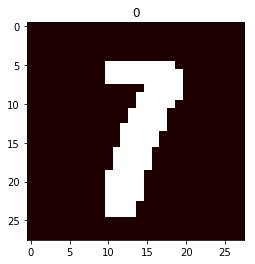

In [40]:
i=proba_inds[0]
img=X_train.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='pink')
plt.title(X_train.iloc[i,0])

##### The digit that the model is least confident about

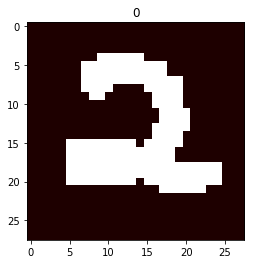

In [41]:
i=proba_inds[-1]
img=X_train.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='pink')
plt.title(X_train.iloc[i,0])

The least confident example looks somewhat like 2, and the most confident example looks like a very typical 7. With more than just two colors it would be more obvious.

#### Prediction confidence vs regularization strength (C).

On the example of softmax/multinomial model let´s see the value of C lead affects prediction confidence.

In [47]:
# Set the regularization strength of two levels
model_c = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=0.1)
model_c1 = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1)

# Fit:
model_c.fit(X_train,y_train.values.ravel())
model_c1.fit(X_train,y_train.values.ravel())

# Predict probabilities on training points
prob_c = model_c.predict_proba(X_train)
prob_1 = model_c1.predict_proba(X_train)
print("Maximum predicted probability with C = 0.1 is", np.max(prob_c))
print("Maximum predicted probability with C = 1 is", np.max(prob_1))

Maximum predicted probability with C = 0.1 is 0.999996913121489
Maximum predicted probability with C = 1 is 0.9999999995902189


 Notice that smaller values of C lead to less confident predictions. That's because smaller C means more 
 regularization and smaller coefficients. Raw model outputs closer to zero and, thus, probabilities closer to 0.5 
 after the raw model output is squashed through the sigmoid function.

#### Regularization vs. error rate/L2 regularization  effect.

We are going to loop over the different values of C_value, fitting a model each time than save the error on the training set 
and the validation set for each model.

In [46]:
# Loop over values of C
train_errs = []  
test_errs  = []
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value )
    lr.fit(X_train, y_train.values.ravel())

    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train.values.ravel()) )
    test_errs.append( 1.0 - lr.score(X_test,  y_test.values.ravel()) )

In [44]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Plotting the training and testing error as a function of the regularization parameter.

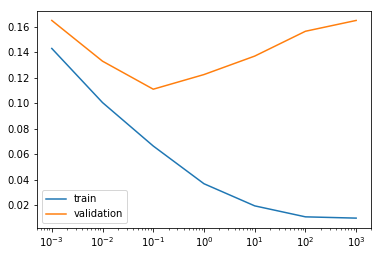

In [45]:
# Plot results
plt.semilogx(C_values, train_errs, C_values, test_errs)
plt.legend(("train", "validation"))
plt.show()

 Too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) 
doesn't work well either - due to overfitting.

#### Logistic regression and feature selection using L1 regularization.

In [48]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train.values.ravel())

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))
print("Train score",searcher.score(X_train, y_train.values.ravel()))
print("Test score",searcher.score(X_test, y_test.values.ravel()))

Best CV params {'C': 1}
Total number of features: 7840
Number of selected features: 2659
Train score 0.955875
Test score 0.88


Many features were discarded here.

### 2.3 Tuning Grid Search & fitting both models.

In [56]:
# Tuning
parameters_mn = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty':[ "l2"]} # softmax/multinomial supports pnly l2 penalty.
parameters    = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty':["l1", "l2"]}
searcher_mn = GridSearchCV(lr_mn, parameters_mn, cv=5)
searcher_ovr = GridSearchCV(lr_ovr, parameters,  cv=5)
#Fitting
searcher_mn.fit(X_train, y_train.values.ravel())
searcher_ovr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
# Report the best parameters and the corresponding score for softmax/multinomial model.
print("Best CV params", searcher_mn.best_params_)
print("Best CV accuracy", searcher_mn.best_score_)
print("Test accuracy of best grid search hypers:", searcher_mn.score(X_test, y_test.values.ravel()))

Best CV params {'C': 0.1, 'penalty': 'l2'}
Best CV accuracy 0.90275
Test accuracy of best grid search hypers: 0.8915


In [59]:
# Report the best parameters and the corresponding score for one-vs-rest model.
print("Best CV params", searcher_ovr.best_params_)
print("Best CV accuracy", searcher_ovr.best_score_)
print("Test accuracy of best grid search hypers:", searcher_ovr.score(X_test, y_test.values.ravel()))

Best CV params {'C': 0.1, 'penalty': 'l2'}
Best CV accuracy 0.896
Test accuracy of best grid search hypers: 0.889


## 3 SGDClassifier

In [61]:
# We set random_state=0 for reproducibility 

linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':["hinge", "log"], 'penalty':[ "l1", "l2" ]}
searcher_sgd = GridSearchCV(linear_classifier, parameters, cv=5)
searcher_sgd.fit(X_train, y_train.values.ravel())

# Report the best parameters and the corresponding score
print("Best CV params", searcher_sgd.best_params_)
print("Best CV accuracy",searcher_sgd.best_score_)
print("Test accuracy of best grid search hypers:", searcher_sgd.score(X_test, y_test.values.ravel()))

Best CV params {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.889
Test accuracy of best grid search hypers: 0.877


## 4. Comparing the models.

In [63]:
print("Test accuracy SVM:", searcher_svm.score(X_test, y_test.values.ravel()))
print("Test accuracy OVR:", searcher_ovr.score(X_test, y_test.values.ravel()))
print("Test accuracy multinomial:", searcher_mn.score(X_test, y_test.values.ravel()))
print("Test accuracy SGD:", searcher_sgd.score(X_test, y_test.values.ravel()))

Test accuracy SVM: 0.963
Test accuracy OVR: 0.889
Test accuracy multinomial: 0.8915
Test accuracy SGD: 0.877


SVM looks like the best choise here.

## 5. Predicting and saving the results

In [64]:
df_test[df_test>0]=1

In [65]:
predict = searcher_svm.predict(df_test)
df=pd.DataFrame(predict)
df.index+=1
final_submission=pd.DataFrame({"ImageId": list(range(1,len(predict)+1)),
                         "Label": predict})


In [66]:
predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [72]:
final_submission.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [73]:
final_submission.to_csv("second_submission.csv", index=False, header=True)

This model scored 0.96200